In [59]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Reading the Data

In [61]:
advertising = pd.read_csv('Advertising_Dataset.csv')

In [62]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [63]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [64]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [65]:
advertising.shape

(200, 4)

### Visualising Data

<AxesSubplot:xlabel='TV', ylabel='Sales'>

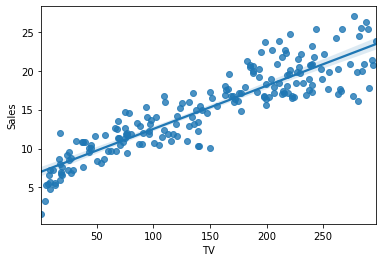

In [66]:
sns.regplot(data = advertising, x='TV', y='Sales')

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

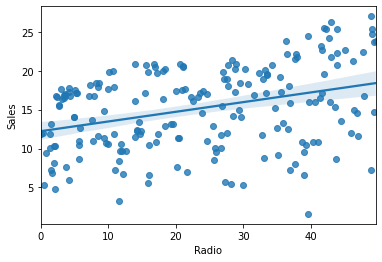

In [67]:
sns.regplot(data = advertising, x='Radio', y='Sales')

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

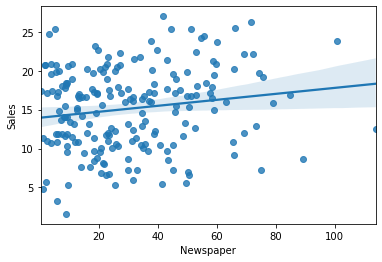

In [68]:
sns.regplot(data = advertising, x='Newspaper', y='Sales')

<AxesSubplot:>

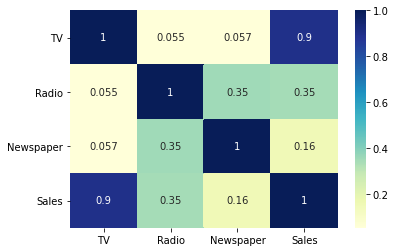

In [69]:
sns.heatmap(advertising.corr(), cmap='YlGnBu', annot=True)

In [70]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Creating X, Y columns

In [71]:
X = advertising['TV']
y = advertising['Sales']

#### Splitting in train test data set

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [73]:
train_X.size

140

## Training model using stats library

In [74]:
X_train_sm = sm.add_constant(X_train)

In [75]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


#### Fitting model

In [76]:
lr = sm.OLS(y_train, X_train_sm)

In [77]:
lr_model = lr.fit()

In [78]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [79]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.52e-52
Time:                        22:16:44   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
y_train_pred = lr_model.predict(X_train_sm)

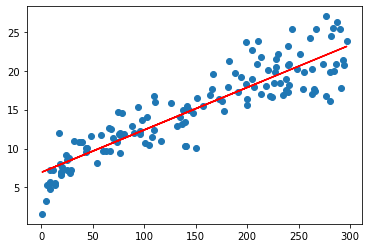

In [81]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

### Residual

In [82]:
res = y_train - y_train_pred

<AxesSubplot:ylabel='Density'>

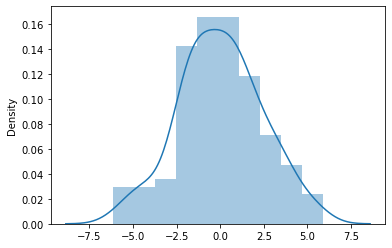

In [83]:
plt.figure()
sns.distplot(res)

#### From above graph, we can see that Error Terms are normally distributed

#### Look for patterns

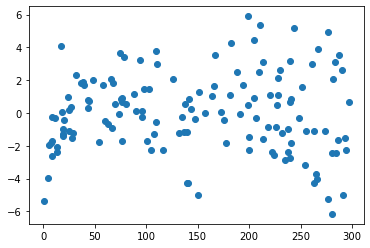

In [84]:
plt.scatter(X_train, res)
plt.show()

#### No visible patterns, so Error Terms are independant of each other

### Predictions and Evaluation:

In [85]:
# Add constant

X_test_sm = sm.add_constant(X_test)

In [86]:
# Predict on test

y_test_pred = lr_model.predict(X_test_sm)

In [87]:
# Evaluate on r squared

r2 = r2_score(y_true = y_test, y_pred=y_test_pred)
r2

0.792103160124566

In [88]:
# r2 on train

r2_score(y_true = y_train, y_pred=y_train_pred)

0.8157933136480389

In [89]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826953

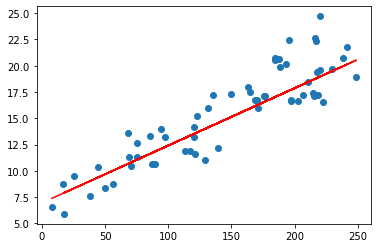

In [90]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Model using sklearn Library

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [108]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [109]:
y_train_lm = y_train.values.reshape(-1,1)
y_test_lm = y_test.values.reshape(-1,1)

In [110]:
lm= LinearRegression()

In [112]:
lm.fit(X_train_lm, y_train)

LinearRegression()

In [117]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.9486832000013585


In [119]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [122]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480388
0.792103160124566
